In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
RANDOM_SEED = 139

In [3]:
train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

In [4]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [5]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

In [6]:
# training the tree
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=139, splitter='best')

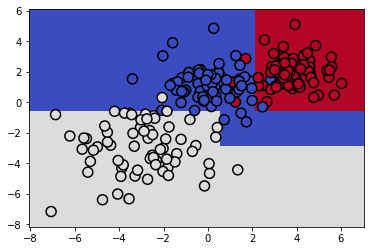

In [7]:
# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Decision Tree on the real Dataset

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [9]:
df = pd.read_csv('bill_authentication.csv')

In [10]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
df.sample()

,Variance,Skewness,Curtosis,Entropy,Class
24,4.4338,9.887,-4.6795,-3.7483,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [14]:
X=df.drop('Class', axis=1)
y=df['Class']

In [15]:
RANDOM_SEED=17

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=RANDOM_SEED)

In [17]:
clf_tree = DecisionTreeClassifier(max_features=2, max_depth=3, random_state=RANDOM_SEED)

In [18]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [19]:
f1_score(y_test, clf_tree.predict(X_test))

0.8663967611336032

In [20]:
pred_class = clf_tree.predict(np.array([2.04378,-0.38422,1.437292,0.76421]).reshape(1, -1))
pred_class

array([0], dtype=int64)

In [21]:
clf_tree.predict(np.array([-6.0598,9.2952,-0.43642,-6.3694]).reshape(1, -1))

array([1], dtype=int64)

Переобученное дерево

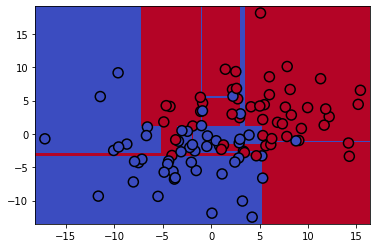

In [22]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

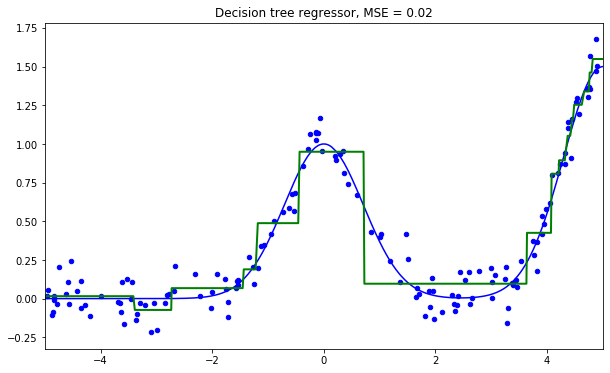

In [23]:
RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

In [24]:
df = pd.read_csv('petrol_consumption.csv')

In [26]:
df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
28,8.0,4188,5975,0.563,574
44,6.0,5215,2302,0.672,782
18,7.0,4716,5915,0.724,865
45,9.0,4476,3942,0.571,510
11,7.5,5126,14186,0.525,471


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [28]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [29]:
RANDOM_SEED = 42

In [30]:
X=df.drop('Petrol_Consumption', axis=1)
y=df['Petrol_Consumption']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RANDOM_SEED)

In [34]:
reg_tree = DecisionTreeRegressor(random_state=RANDOM_SEED)
reg_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

print("Decision tree regressor, RMSE = %.2f" % np.sqrt(np.mean((y_test - reg_tree_pred) ** 2)))

Decision tree regressor, RMSE = 87.97


In [36]:
print(reg_tree.get_depth())

11
